<a href="https://colab.research.google.com/github/PratyushMaharana/stocks-prediciton/blob/main/price_and_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***sim card ***

In [2]:
import requests
def get_sim_details(phone_number, api_key):

    url = f"http://apilayer.net/api/validate"
    params = {
        "access_key": api_key,
        "number": phone_number,
    }
    response = requests.get(url, params=params)
    data = response.json()

    if not data.get("valid", False):
        return {"error": "Invalid phone number."}

    details = {
        "phone_number": data.get("international_format"),
        "country": data.get("country_name"),
        "location": data.get("location"),
        "carrier": data.get("carrier"),
        "line_type": data.get("line_type"),
    }

    return details
api_key = "your api key"
phone_number = "phone number"
sim_details = get_sim_details(phone_number, api_key)
if "error" in sim_details:
    print(sim_details["error"])
else:
    print(f"Phone Number: {sim_details['phone_number']}")
    print(f"Country: {sim_details['country']}")
    print(f"Location (State): {sim_details['location']}")
    print(f"Carrier: {sim_details['carrier']}")
    print(f"Line Type: {sim_details['line_type']}")


Invalid phone number.


\stock prediction

In [9]:
!pip install yfinance
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Download Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451464,6.487877,6.417458,6.458084,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800


## ***stock prediction ***

ERROR: Operation cancelled by user


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/pretrained_lstm_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Training a new model...
Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.0231
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 3.2604e-04
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 3.0103e-04
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 3.1188e-04
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 3.5346e-04
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 2.8032e-04
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 3.1210e-04
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 2.2358e-04
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 2.6533e-04
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 2.4122e-04


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


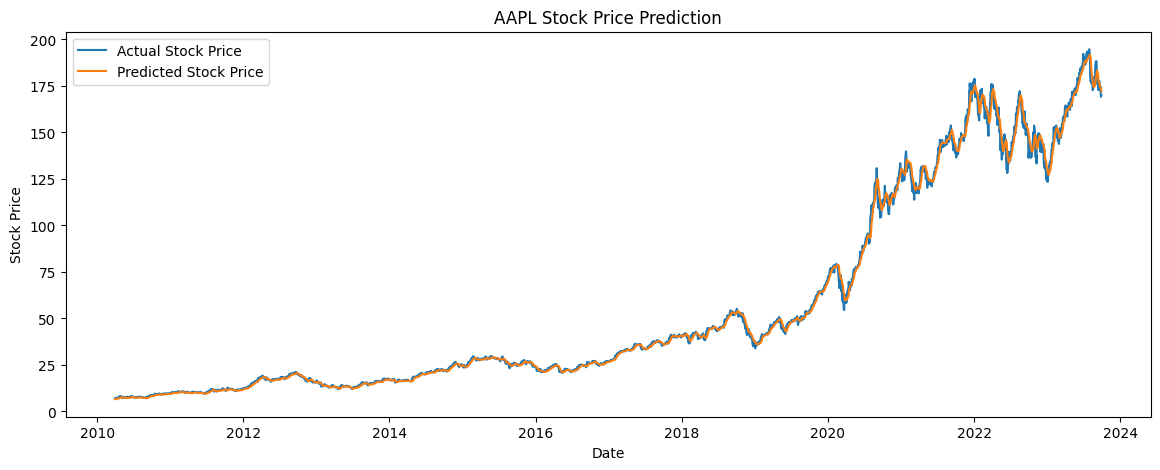

In [23]:
# Step 1: Install required libraries
!pip install yfinance tensorflow scikit-learn pandas numpy matplotlib

# Step 2: Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM

# Step 3: Download and preprocess data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
data = data[['Close']]
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Load the pre-trained model
try:
    model = load_model('/content/drive/MyDrive/pretrained_lstm_model.h5')  # Update the path
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Training a new model...")
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, batch_size=32, epochs=10)
    model.save('pretrained_lstm_model.h5')

# Step 5: Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Step 6: Plot the results
plt.figure(figsize=(14,5))
plt.plot(data.index[time_step:], dataset[time_step:], label='Actual Stock Price')
plt.plot(data.index[time_step:], predictions, label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**bold text**

In [25]:
# Step 1: Install required libraries
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install tensorflow

# Step 2: Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 3: Download AAPL data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
data = data[['Close']]  # Use only the 'Close' column

# Step 4: Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=32, epochs=10)

# Step 6: Predict future prices
future_days = 30  # Number of days to predict into the future
predictions = []

# Use the last `time_step` days of data to predict the next day
last_sequence = scaled_data[-time_step:]  # Last 60 days of data
last_sequence = last_sequence.reshape(1, time_step, 1)

for _ in range(future_days):
    # Predict the next day's price
    next_price = model.predict(last_sequence)
    predictions.append(next_price[0, 0])

    # Update the sequence with the predicted price
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_price]], axis=1)

# Inverse transform the predictions to actual prices
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Step 7: Create a DataFrame for future dates and predictions
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1)[1:]  # Exclude the last date
future_predictions = pd.DataFrame(index=future_dates, data=predictions, columns=['Predicted Price'])

# Step 8: Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Prices', color='blue')
plt.plot(future_predictions.index, future_predictions['Predicted Price'], label='Predicted Future Prices', color='red', linestyle='--')
plt.title(f'{ticker} Historical and Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Step 9: Print the future predictions
print(future_predictions)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0118
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 2.7534e-04
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 3.0586e-04
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 2.8571e-04
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 2.8328e-04
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 2.4399e-04
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 2.1318e-04
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 2.6371e-04
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 2.9543e-04
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.2521e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

### live stock plot

[*********************100%***********************]  1 of 1 completed


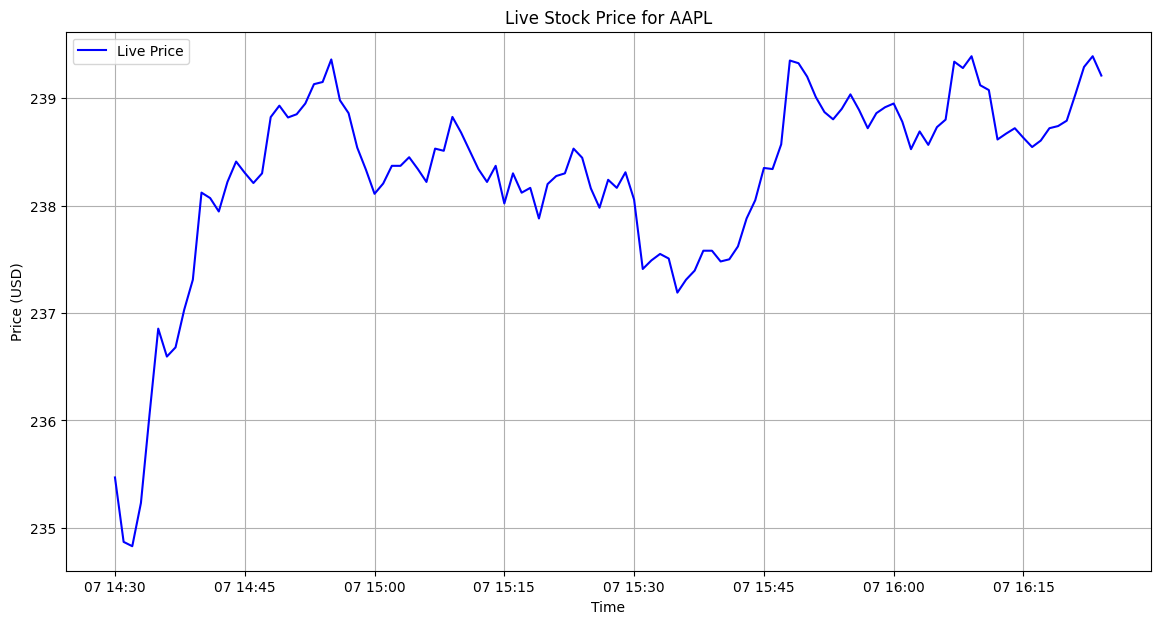

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [26]:
# Step 1: Install required libraries
!pip install yfinance matplotlib

# Step 2: Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import time

# Step 3: Define the stock ticker
ticker = 'AAPL'  # Change this to any stock symbol (e.g., 'TSLA', 'GOOGL')

# Step 4: Set up the plot
plt.ion()  # Turn on interactive mode for live updating
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_xlabel('Time')
ax.set_ylabel('Price (USD)')
ax.set_title(f'Live Stock Price for {ticker}')

# Step 5: Fetch and plot live data
while True:
    try:
        # Fetch live data (1-minute interval)
        data = yf.download(ticker, period='1d', interval='1m')
        data = data[['Close']]  # Use only the 'Close' price

        # Clear the previous plot
        ax.clear()

        # Plot the live data
        ax.plot(data.index, data['Close'], label='Live Price', color='blue')
        ax.set_xlabel('Time')
        ax.set_ylabel('Price (USD)')
        ax.set_title(f'Live Stock Price for {ticker}')
        ax.legend()
        ax.grid()

        # Pause to update the plot
        plt.pause(60)  # Update every 60 seconds

        # Wait for 60 seconds before fetching new data
        time.sleep(60)
    except Exception as e:
        print(f"Error: {e}")
        break

## ***stock future prediction ***

In [27]:
# Step 1: Install required libraries
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install scikit-learn

# Step 2: Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 3: Download historical data for AAPL
ticker = 'AAPL'  # Change this to any stock symbol (e.g., 'TSLA', 'GOOGL')
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
data = data[['Close']]  # Use only the 'Close' price

# Step 4: Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use 60 days of historical data to predict the next day
X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

# Step 5: Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=32, epochs=10)

# Step 6: Predict future prices
future_days = 30  # Number of days to predict into the future
predictions = []

# Use the last `time_step` days of data to predict the next day
last_sequence = scaled_data[-time_step:]  # Last 60 days of data
last_sequence = last_sequence.reshape(1, time_step, 1)

for _ in range(future_days):
    # Predict the next day's price
    next_price = model.predict(last_sequence)
    predictions.append(next_price[0, 0])

    # Update the sequence with the predicted price
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_price]], axis=1)

# Inverse transform the predictions to actual prices
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Step 7: Create a DataFrame for future dates and predictions
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1)[1:]  # Exclude the last date
future_predictions = pd.DataFrame(index=future_dates, data=predictions, columns=['Predicted Price'])

# Step 8: Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Prices', color='blue')
plt.plot(future_predictions.index, future_predictions['Predicted Price'], label='Predicted Future Prices', color='red', linestyle='--')
plt.title(f'{ticker} Historical and Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Step 9: Print the future predictions
print(future_predictions)

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0240
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 3.1573e-04
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 3.1970e-04
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 2.9546e-04
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 2.5845e-04
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.4556e-04
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 2.3557e-04
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.3888e-04
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 2.1621e-04
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 2.4512e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)